**All import statements required in the code**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTENC
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score, f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

Merge the `email_table` with `email_opened_table` and `link_clicked_table` to create new binary features:

- **email_opened** (1 if opened, else 0)

- **link_clicked** (1 if clicked, else 0)

In [2]:
# Load the datasets
email_table = pd.read_csv("email_table.csv")
email_opened = pd.read_csv("email_opened_table.csv")
link_clicked = pd.read_csv("link_clicked_table.csv")

# Create binary feature: email_opened (1 if opened, 0 otherwise)
email_table['email_opened'] = email_table['email_id'].isin(email_opened['email_id']).astype(int)

# Create binary feature: link_clicked (1 if clicked, 0 otherwise)
email_table['link_clicked'] = email_table['email_id'].isin(link_clicked['email_id']).astype(int)

# Save the merged dataset
email_table.to_csv("merged_email_data.csv", index=False)

email_table.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened,link_clicked
0,85120,short_email,personalized,2,Sunday,US,5,0,0
1,966622,long_email,personalized,12,Sunday,UK,2,1,1
2,777221,long_email,personalized,11,Wednesday,US,2,0,0
3,493711,short_email,generic,6,Monday,UK,1,0,0
4,106887,long_email,generic,14,Monday,US,6,0,0


### Data Preprocessing

In [3]:
email_table['email_opened'].value_counts()

email_opened
0    89655
1    10345
Name: count, dtype: int64

In [4]:
email_table['link_clicked'].value_counts()

link_clicked
0    97881
1     2119
Name: count, dtype: int64

In [5]:
email_table.shape

(100000, 9)

In [6]:
email_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   email_id             100000 non-null  int64 
 1   email_text           100000 non-null  object
 2   email_version        100000 non-null  object
 3   hour                 100000 non-null  int64 
 4   weekday              100000 non-null  object
 5   user_country         100000 non-null  object
 6   user_past_purchases  100000 non-null  int64 
 7   email_opened         100000 non-null  int64 
 8   link_clicked         100000 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 6.9+ MB


In [7]:
email_table.describe()

,email_id,hour,user_past_purchases,email_opened,link_clicked
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,498690.196160,9.059300,3.87845,0.103450,0.021190
std,289230.727534,4.439637,3.19611,0.304547,0.144018
min,8.000000,1.000000,0.00000,0.000000,0.000000
25%,246708.250000,6.000000,1.00000,0.000000,0.000000
50%,498447.000000,9.000000,3.00000,0.000000,0.000000
75%,749942.750000,12.000000,6.00000,0.000000,0.000000
max,999998.000000,24.000000,22.00000,1.000000,1.000000


In [8]:
email_table.nunique()

email_id               100000
email_text                  2
email_version               2
hour                       24
weekday                     7
user_country                4
user_past_purchases        23
email_opened                2
link_clicked                2
dtype: int64

In [9]:
email_table['user_country'].value_counts()

user_country
US    60099
UK    19939
FR     9995
ES     9967
Name: count, dtype: int64

In [10]:
email_table['email_text'].value_counts()

email_text
long_email     50276
short_email    49724
Name: count, dtype: int64

In [11]:
email_table['email_version'].value_counts()

email_version
generic         50209
personalized    49791
Name: count, dtype: int64

In [12]:
email_table['hour'].value_counts()

hour
9     8529
8     8398
7     8204
10    8180
11    7483
6     7465
5     6551
12    6508
4     5622
13    5581
3     4610
14    4580
2     3676
15    3493
16    2759
1     2703
17    1893
18    1421
19     905
20     656
21     365
22     204
23     145
24      69
Name: count, dtype: int64

In [13]:
email_table['weekday'].value_counts()

weekday
Saturday     14569
Sunday       14387
Monday       14363
Thursday     14277
Friday       14177
Tuesday      14143
Wednesday    14084
Name: count, dtype: int64

In [14]:
email_table['user_past_purchases'].value_counts()

user_past_purchases
0     13877
1     13751
2     13036
3     12077
4     10743
5      9042
6      7518
7      6051
8      4393
9      3296
10     2363
11     1553
12      944
13      578
14      362
15      188
16      102
17       60
18       35
19       15
20       11
21        4
22        1
Name: count, dtype: int64

In [15]:
email_table.duplicated().sum()

np.int64(0)

In [16]:
email_table.isnull().sum()

email_id               0
email_text             0
email_version          0
hour                   0
weekday                0
user_country           0
user_past_purchases    0
email_opened           0
link_clicked           0
dtype: int64

So, there are no null or missing values that we have to deal with, let's confirm this by plotting a heatmap too

<Axes: >

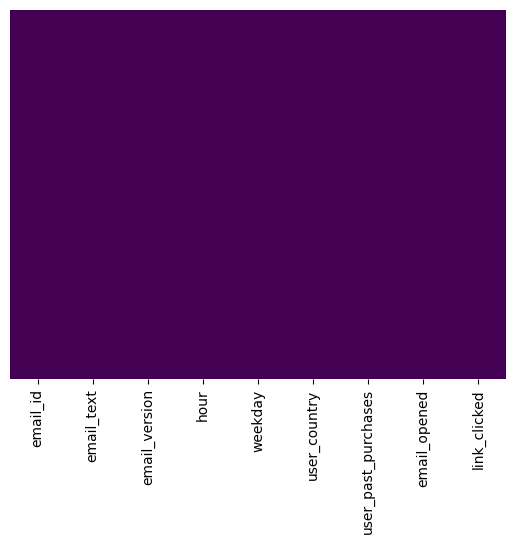

In [17]:
sns.heatmap(email_table.isnull(), yticklabels=False, cbar=False, cmap="viridis")

### Outlier detection for user_past_purchases

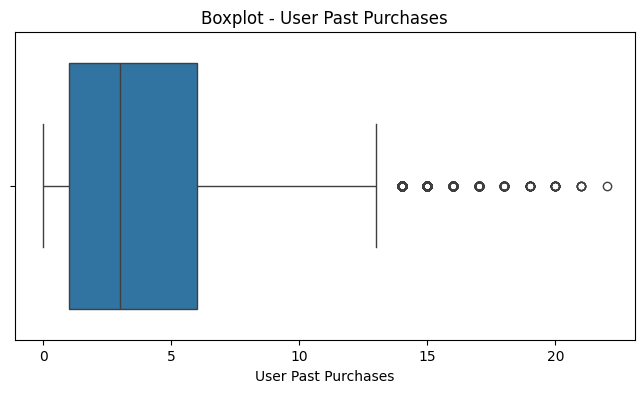

In [18]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=email_table['user_past_purchases'])
plt.title("Boxplot - User Past Purchases")
plt.xlabel("User Past Purchases")
plt.show()

It seems that `user_past_purchases` above around 13 are considered to be outliers

Total outlier users: 778
Outlier users who clicked the link: 79


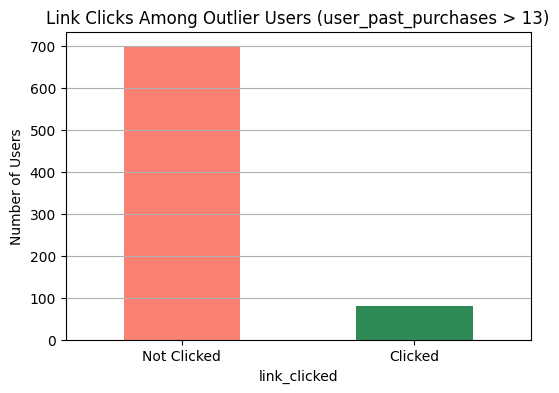

In [19]:
# Define outliers: user_past_purchases > 13
outliers = email_table[email_table['user_past_purchases'] > 13]

# Total number of outlier users
total_outliers = outliers['email_id'].nunique()
print("Total outlier users:", total_outliers)

# Outliers who clicked the link
clicked_outliers = outliers[outliers['link_clicked'] == 1]
total_clicked_outliers = clicked_outliers['email_id'].nunique()
print("Outlier users who clicked the link:", total_clicked_outliers)

# Compare clicked vs not clicked among outliers
outlier_click_counts = outliers['link_clicked'].value_counts().rename({0: 'Not Clicked', 1: 'Clicked'})

# Plot
plt.figure(figsize=(6, 4))
outlier_click_counts.plot(kind='bar', color=['salmon', 'seagreen'])
plt.title("Link Clicks Among Outlier Users (user_past_purchases > 13)")
plt.ylabel("Number of Users")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Users having `user_past_purchases` more than the outlier threshold (13) are considered to be valuable. 

Outlier users: 778
Clicked link: 79 (~10.15% CTR)
Overall click rate: 2.1%

That’s nearly 5x the average click rate — so yes, this is a meaningful user segment and hence, creating a new feature called `is_high_purchaser` is necessary.

In [20]:
email_table['is_high_purchaser'] = (email_table['user_past_purchases'] > 13).astype(int) # 13 is the IQR threshold

In [21]:
email_table.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened,link_clicked,is_high_purchaser
0,85120,short_email,personalized,2,Sunday,US,5,0,0,0
1,966622,long_email,personalized,12,Sunday,UK,2,1,1,0
2,777221,long_email,personalized,11,Wednesday,US,2,0,0,0
3,493711,short_email,generic,6,Monday,UK,1,0,0,0
4,106887,long_email,generic,14,Monday,US,6,0,0,0


### Outlier Detection for hour

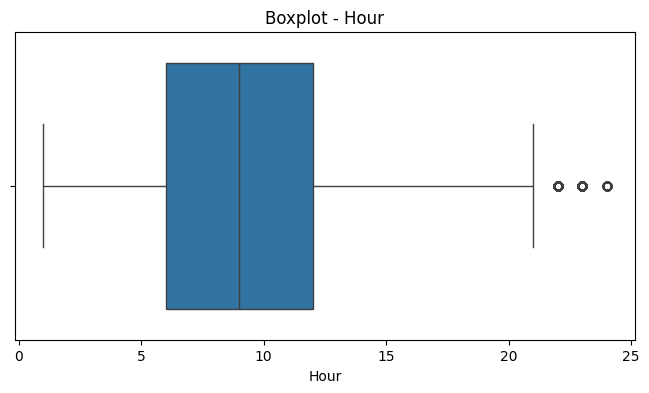

In [22]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=email_table['hour'])
plt.title("Boxplot - Hour")
plt.xlabel("Hour")
plt.show()

It is evident that emails sent between 21 hours and 24 hours behave as outliers

Total outlier-hour emails (hour > 21): 418
Clicked outlier-hour emails: 12


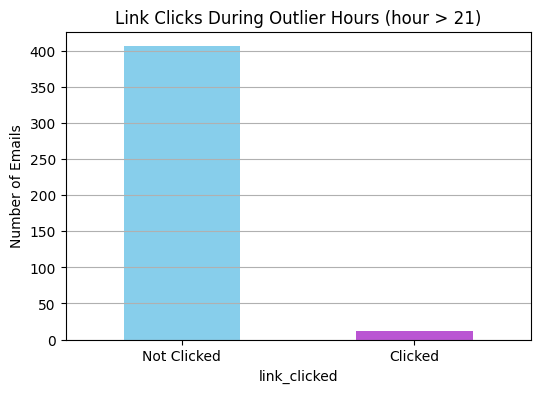

In [23]:
# Define outliers in hour: hour > 21
hour_outliers = email_table[email_table['hour'] > 21]

# Total number of emails sent during outlier hours
total_hour_outliers = hour_outliers['email_id'].nunique()
print("Total outlier-hour emails (hour > 21):", total_hour_outliers)

# Outlier-hour emails where the link was clicked
clicked_hour_outliers = hour_outliers[hour_outliers['link_clicked'] == 1]
total_clicked_hour_outliers = clicked_hour_outliers['email_id'].nunique()
print("Clicked outlier-hour emails:", total_clicked_hour_outliers)

# Compare clicked vs not clicked
hour_outlier_click_counts = hour_outliers['link_clicked'].value_counts().rename({0: 'Not Clicked', 1: 'Clicked'})

# Plot
plt.figure(figsize=(6, 4))
hour_outlier_click_counts.plot(kind='bar', color=['skyblue', 'mediumorchid'])
plt.title("Link Clicks During Outlier Hours (hour > 21)")
plt.ylabel("Number of Emails")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

### Exploratory Data Analysis (EDA)

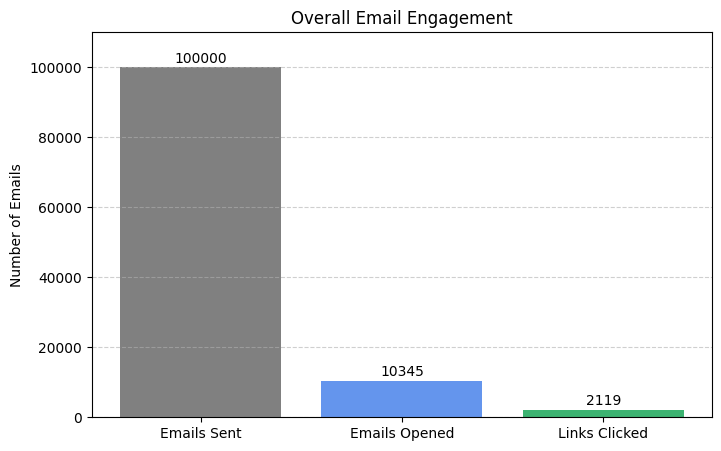

In [24]:
engagement_counts = {
    "Emails Sent": len(email_table),
    "Emails Opened": email_table['email_opened'].sum(),
    "Links Clicked": email_table['link_clicked'].sum()
}

plt.figure(figsize=(8, 5))
bars = plt.bar(engagement_counts.keys(), engagement_counts.values(), color=["gray", "cornflowerblue", "mediumseagreen"])
plt.title("Overall Email Engagement")
plt.ylabel("Number of Emails")
plt.ylim(0, max(engagement_counts.values()) * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, f'{int(yval)}', ha='center', va='bottom')

plt.show()

**Grouped bar chart to show how `email_text` (`short_email` vs `long_email`) affects the link click rate.**

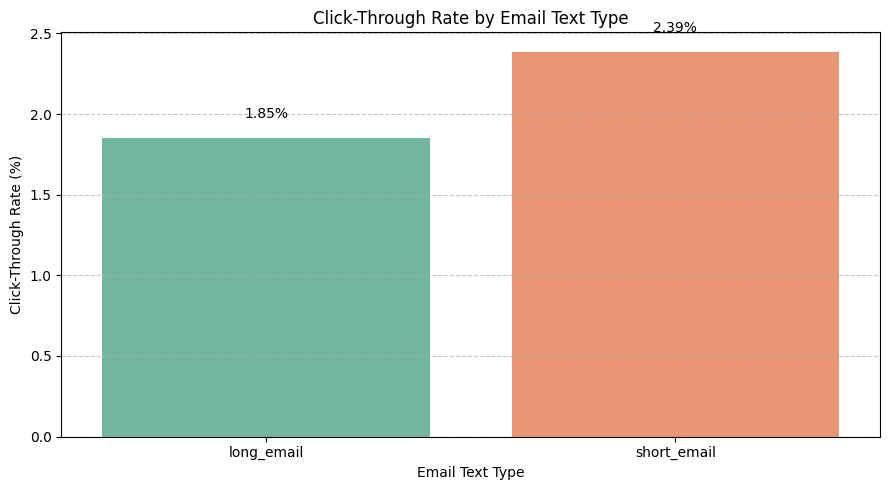

In [25]:
# Calculate click-through rate (CTR) for each email_text type
clicks_by_text = email_table.groupby('email_text')['link_clicked'].agg(['mean', 'count']).reset_index()
clicks_by_text['CTR (%)'] = clicks_by_text['mean'] * 100

plt.figure(figsize=(9, 5))
sns.barplot(data=clicks_by_text, x='email_text', y='CTR (%)', palette='Set2', hue='email_text', legend=False)

plt.title("Click-Through Rate by Email Text Type", fontsize=12)
plt.ylabel("Click-Through Rate (%)")
plt.xlabel("Email Text Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars
for index, row in clicks_by_text.iterrows():
    plt.text(index, row['CTR (%)'] + 0.1, f"{row['CTR (%)']:.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

It is evident that the **CTR is more for short emails**, which is pretty obvious because who cares to read long texts nowadays!

**Bar chart showing how `email_version` (`generic` vs `personalized`) affects link click-through rate.**

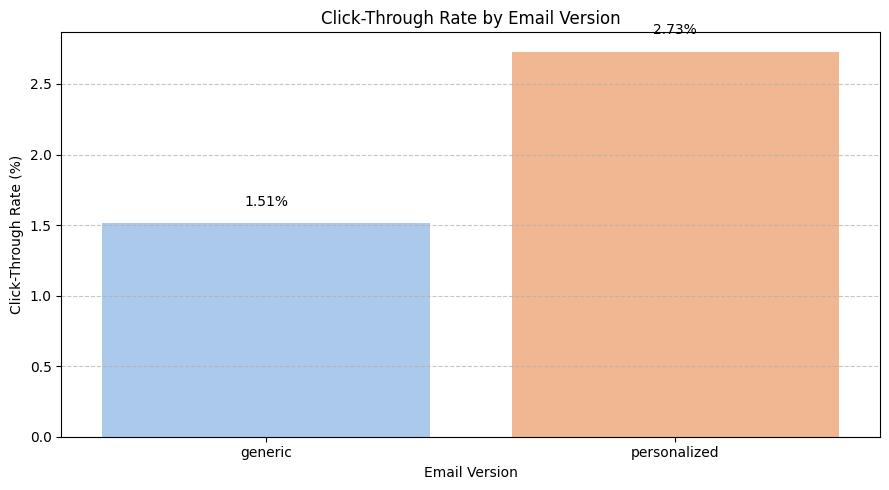

In [26]:
# Calculate CTR by email_version
clicks_by_version = email_table.groupby('email_version')['link_clicked'].mean().reset_index()
clicks_by_version['CTR (%)'] = clicks_by_version['link_clicked'] * 100

plt.figure(figsize=(9, 5))
sns.barplot(data=clicks_by_version, x='email_version', y='CTR (%)', palette='pastel', hue='email_version', legend=False)

plt.title("Click-Through Rate by Email Version", fontsize=12)
plt.ylabel("Click-Through Rate (%)")
plt.xlabel("Email Version")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate
for index, row in clicks_by_version.iterrows():
    plt.text(index, row['CTR (%)'] + 0.1, f"{row['CTR (%)']:.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

Again, it is evident that people get **more engaged with personalized emails** rather than generic ones

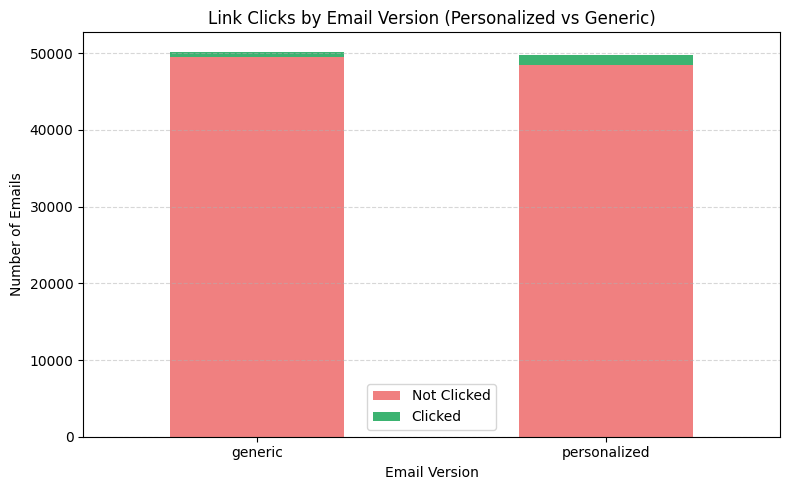

In [27]:
# Count clicks and non-clicks for each version
personalization_ct = email_table.groupby(['email_version', 'link_clicked']).size().unstack(fill_value=0)

# Plot
personalization_ct.plot(kind='bar', stacked=True, color=['lightcoral', 'mediumseagreen'], figsize=(8, 5))

plt.title("Link Clicks by Email Version (Personalized vs Generic)")
plt.xlabel("Email Version")
plt.ylabel("Number of Emails")
plt.legend(['Not Clicked', 'Clicked'])
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**This heatmap will show at what time and on what day users are most likely to click the email link.**

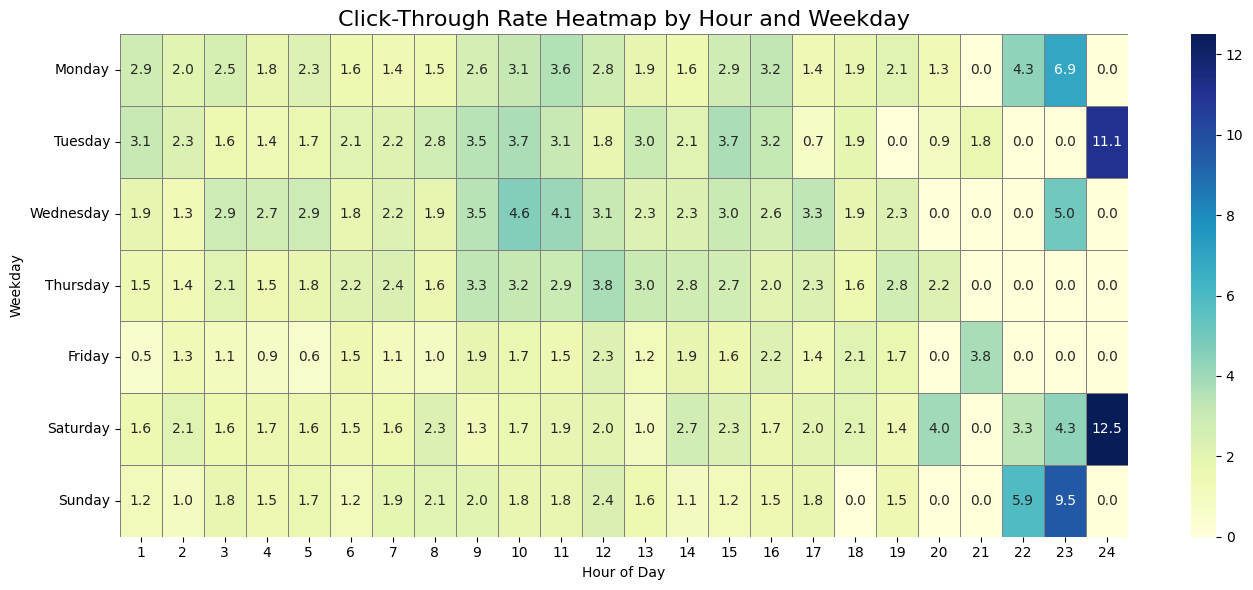

In [28]:
# Calculate click-through rate for each (hour, weekday) pair
ctr_heatmap = email_table.groupby(['weekday', 'hour'])['link_clicked'].mean().reset_index()
ctr_pivot = ctr_heatmap.pivot(index='weekday', columns='hour', values='link_clicked') * 100

# Reorder weekday for proper order
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ctr_pivot = ctr_pivot.reindex(ordered_days)

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(ctr_pivot, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("Click-Through Rate Heatmap by Hour and Weekday", fontsize=16)
plt.xlabel("Hour of Day")
plt.ylabel("Weekday")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Which user countries are most engaged with the email campaigns?**

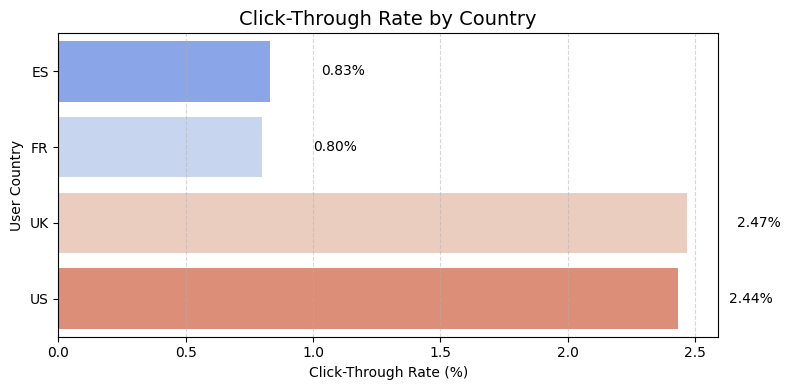

In [29]:
# Compute CTR by user_country
country_ctr = email_table.groupby('user_country')['link_clicked'].mean().reset_index()
country_ctr['CTR (%)'] = country_ctr['link_clicked'] * 100

# Plot horizontal bar chart
plt.figure(figsize=(8, 4))
sns.barplot(data=country_ctr, y='user_country', x='CTR (%)', palette='coolwarm', hue='user_country', legend=False)

plt.title("Click-Through Rate by Country", fontsize=14)
plt.xlabel("Click-Through Rate (%)")
plt.ylabel("User Country")
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Annotate bars
for index, row in country_ctr.iterrows():
    plt.text(row['CTR (%)'] + 0.2, index, f"{row['CTR (%)']:.2f}%", va='center')

plt.tight_layout()
plt.show()

**This chart will show how the number of past purchases influences a user's likelihood to click the email link.**

C:\Users\HP\AppData\Local\Temp\ipykernel_40144\2113212075.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_ctr = email_table.groupby('purchase_bin')['link_clicked'].mean().reset_index()


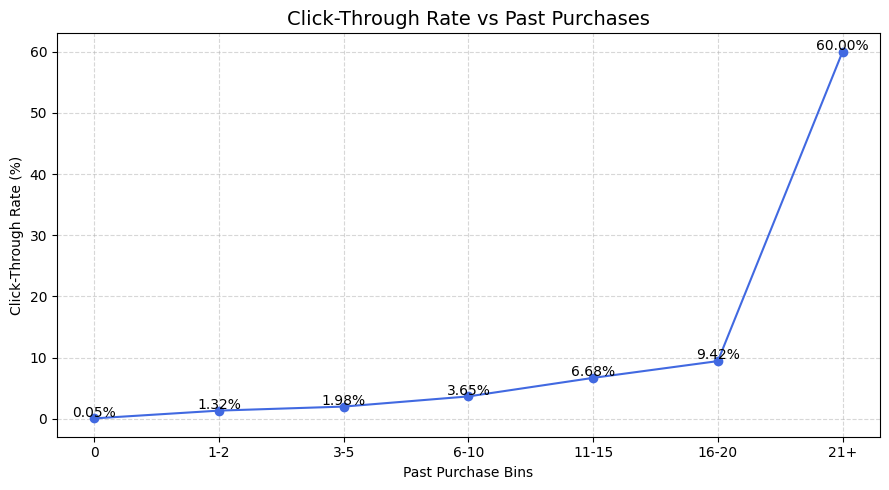

In [30]:
# Create bins for past purchases
bins = [-1, 0, 2, 5, 10, 15, 20, email_table['user_past_purchases'].max()]
labels = ['0', '1-2', '3-5', '6-10', '11-15', '16-20', '21+']
email_table['purchase_bin'] = pd.cut(email_table['user_past_purchases'], bins=bins, labels=labels)

# Calculate CTR for each bin
purchase_ctr = email_table.groupby('purchase_bin')['link_clicked'].mean().reset_index()
purchase_ctr['CTR (%)'] = purchase_ctr['link_clicked'] * 100

# Plot line chart
plt.figure(figsize=(9, 5))
plt.plot(purchase_ctr['purchase_bin'], purchase_ctr['CTR (%)'], marker='o', color='royalblue')
plt.title("Click-Through Rate vs Past Purchases", fontsize=14)
plt.xlabel("Past Purchase Bins")
plt.ylabel("Click-Through Rate (%)")
plt.grid(True, linestyle='--', alpha=0.5)

# Annotate points
for i, row in purchase_ctr.iterrows():
    plt.text(i, row['CTR (%)'] + 0.3, f"{row['CTR (%)']:.2f}%", ha='center')

plt.tight_layout()
plt.show()

Here, we can see an **increasing trend** of CTR with the increase in the `user_past_purchases`, which is also expected because a customer with a good purchase history is more likely to look at the emails.

Also, we can see a hike in the CTR for customers with `user_past_purchases` **more than 21**, which are considered as the most valuable customers.

In [31]:
email_table.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened,link_clicked,is_high_purchaser,purchase_bin
0,85120,short_email,personalized,2,Sunday,US,5,0,0,0,3-5
1,966622,long_email,personalized,12,Sunday,UK,2,1,1,0,1-2
2,777221,long_email,personalized,11,Wednesday,US,2,0,0,0,1-2
3,493711,short_email,generic,6,Monday,UK,1,0,0,0,1-2
4,106887,long_email,generic,14,Monday,US,6,0,0,0,6-10


In [32]:
# Dropping purchase_bin as it was only used for EDA purpose

email_table.drop(columns=["purchase_bin"], inplace=True)
email_table.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened,link_clicked,is_high_purchaser
0,85120,short_email,personalized,2,Sunday,US,5,0,0,0
1,966622,long_email,personalized,12,Sunday,UK,2,1,1,0
2,777221,long_email,personalized,11,Wednesday,US,2,0,0,0
3,493711,short_email,generic,6,Monday,UK,1,0,0,0
4,106887,long_email,generic,14,Monday,US,6,0,0,0


### Encoding the categorical columns

In [33]:
# Copy the original dataset
encoded_table = email_table.copy()

# Define categorical columns to encode
categorical_cols = ['email_text', 'email_version', 'weekday', 'user_country']

# Dictionary to store the encoders to inverse later if needed
label_encoders = {}

# Apply Label Encoding
for col in categorical_cols:
    le = LabelEncoder()
    encoded_table[col] = le.fit_transform(encoded_table[col])
    label_encoders[col] = le  # store encoder for possible inverse_transform

encoded_table.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened,link_clicked,is_high_purchaser
0,85120,1,1,2,3,3,5,0,0,0
1,966622,0,1,12,3,2,2,1,1,0
2,777221,0,1,11,6,3,2,0,0,0
3,493711,1,0,6,1,2,1,0,0,0
4,106887,0,0,14,1,3,6,0,0,0


In [34]:
# Dropping the email_id column as it is not used for modelling

encoded_table.drop(columns=["email_id"], inplace=True)
encoded_table.head()

,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened,link_clicked,is_high_purchaser
0,1,1,2,3,3,5,0,0,0
1,0,1,12,3,2,2,1,1,0
2,0,1,11,6,3,2,0,0,0
3,1,0,6,1,2,1,0,0,0
4,0,0,14,1,3,6,0,0,0


### Train Test Split

In [35]:
# Define features and target
X = encoded_table.drop(columns=['link_clicked'])  # features
y = encoded_table['link_clicked']                # target

# Train-test split with stratification to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Shape check
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 80000
Testing samples: 20000


In [36]:
X_train

,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened,is_high_purchaser
91651,0,0,13,6,3,1,0,0
39112,1,0,13,4,3,5,0,0
67375,1,0,5,3,3,6,1,0
26874,0,0,6,2,3,6,0,0
77705,1,0,5,4,3,7,0,0
...,...,...,...,...,...,...,...,...
82265,1,0,7,4,3,7,0,0
75566,1,0,12,2,0,0,0,0
52087,0,0,14,4,3,3,0,0
78741,1,0,14,3,3,1,0,0


In [37]:
y_test.value_counts()

link_clicked
0    19576
1      424
Name: count, dtype: int64

### Scaling the numerical columns

In [38]:
# Define numerical columns to scale
numeric_cols = ['hour', 'user_past_purchases']

# Initialize scaler
scaler = StandardScaler()

# Fit only on training data
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Transform test data using the same scaler
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [39]:
X_train

,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened,is_high_purchaser
91651,0,0,0.888040,6,3,-0.902236,0,0
39112,1,0,0.888040,4,3,0.350772,0,0
67375,1,0,-0.914458,3,3,0.664023,1,0
26874,0,0,-0.689146,2,3,0.664023,0,0
77705,1,0,-0.914458,4,3,0.977275,0,0
...,...,...,...,...,...,...,...,...
82265,1,0,-0.463834,4,3,0.977275,0,0
75566,1,0,0.662728,2,0,-1.215488,0,0
52087,0,0,1.113353,4,3,-0.275732,0,0
78741,1,0,1.113353,3,3,-0.902236,0,0


In [40]:
y_train.value_counts()

link_clicked
0    78305
1     1695
Name: count, dtype: int64

In [41]:
y_test.value_counts()

link_clicked
0    19576
1      424
Name: count, dtype: int64

Since the target variable (`link_clicked`) is **highly imbalanced**, I had applied **SMOTENC (Synthetic Minority Over-sampling Technique for Nominal and Continuous features)** to oversample the minority class (here 1, that is the number of users who clicked the link). This was done to ensure that the model does not learn biased, giving more preference to the majority class. 

However, it was discovered that the results and evaluation metrics improved when I did not apply **SMOTENC**. This is probably because the model learns faulty when synthetic data is generated. Hence, **SMOTENC** is not applied, below code is commented out.

### Oversampling of the Minority Class

In [42]:
# categorical_cols = ['email_text', 'email_version', 'weekday', 'user_country']

# # Get the column index positions of the categorical columns
# categorical_indices = [X_train.columns.get_loc(col) for col in categorical_cols]

# # Initialize SMOTENC with categorical feature indices
# smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=42)

# # Apply SMOTENC on the training data only
# X_train_balanced, y_train_balanced = smote_nc.fit_resample(X_train, y_train)

# # Check class distribution
# print("After SMOTENC:", Counter(y_train_balanced))

In [43]:
X_train_balanced= X_train
y_train_balanced= y_train

In [44]:
X_train_balanced.head()

,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened,is_high_purchaser
91651,0,0,0.888040,6,3,-0.902236,0,0
39112,1,0,0.888040,4,3,0.350772,0,0
67375,1,0,-0.914458,3,3,0.664023,1,0
26874,0,0,-0.689146,2,3,0.664023,0,0
77705,1,0,-0.914458,4,3,0.977275,0,0


In [45]:
X_train_balanced.shape

(80000, 8)

In [46]:
y_train_balanced.shape

(80000,)

### Training Models

**Logistic Regression**

In [47]:
# Initialize the model
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)

# Fit the model
logreg.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.92065
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     19576
           1       0.21      0.99      0.35       424

    accuracy                           0.92     20000
   macro avg       0.60      0.95      0.65     20000
weighted avg       0.98      0.92      0.94     20000



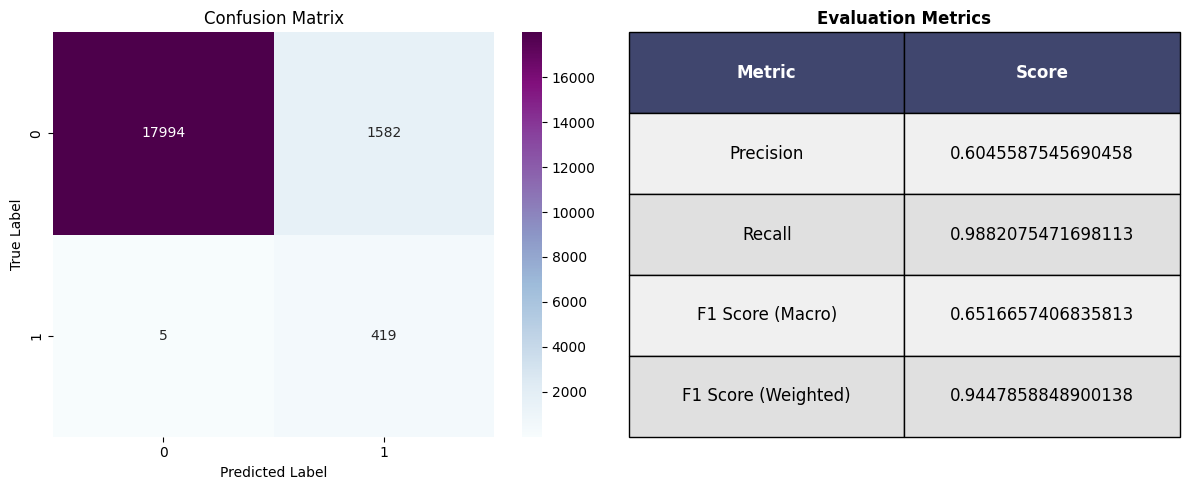

In [48]:
# Calculate metrics
conf_mat = confusion_matrix(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg, average='macro')
recall = recall_score(y_test, y_pred_logreg)
f1_macro = f1_score(y_test, y_pred_logreg, average='macro')
f1_weighted = f1_score(y_test, y_pred_logreg, average='weighted')

# Create metric DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score (Macro)', 'F1 Score (Weighted)'],
    'Score': [precision, recall, f1_macro, f1_weighted]
})

# Plot
plt.figure(figsize=(12, 5))

# Plot Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='BuPu', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Plot Metric Table
plt.subplot(1, 2, 2)
plt.axis('off')  # Hide axes

# Create table
tbl = plt.table(cellText=metrics_df.values,
                colLabels=metrics_df.columns,
                loc='center',
                cellLoc='center',
                colLoc='center',
                bbox=[0, 0, 1, 1])  # Full subplot

# Styling
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1.2, 1.5)

# Add color to header
for key, cell in tbl.get_celld().items():
    row, col = key
    if row == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#40466e')  # dark header
    elif row % 2 == 1:
        cell.set_facecolor('#f0f0f0')  # light gray rows
    else:
        cell.set_facecolor('#e0e0e0')  # alternating slightly darker gray

plt.title("Evaluation Metrics", fontweight='bold')

plt.tight_layout()
plt.show()

**Random Forest Model**

In [49]:
# Initialize the model with key hyperparameters
rf = RandomForestClassifier(
    class_weight='balanced',    # handles class imbalance
    n_estimators=200,           # number of trees
    max_depth=10,               # maximum depth of each tree
    min_samples_split=5,        # minimum samples to split an internal node
    min_samples_leaf=2,         # minimum samples required at a leaf node
    max_features='sqrt',        # number of features to consider when looking for the best split
    bootstrap=True,             # whether bootstrap samples are used
    random_state=42,            # reproducibility
    n_jobs=-1                   # use all processors
)

# Fit the model
rf.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9278
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96     19576
           1       0.22      0.96      0.36       424

    accuracy                           0.93     20000
   macro avg       0.61      0.94      0.66     20000
weighted avg       0.98      0.93      0.95     20000



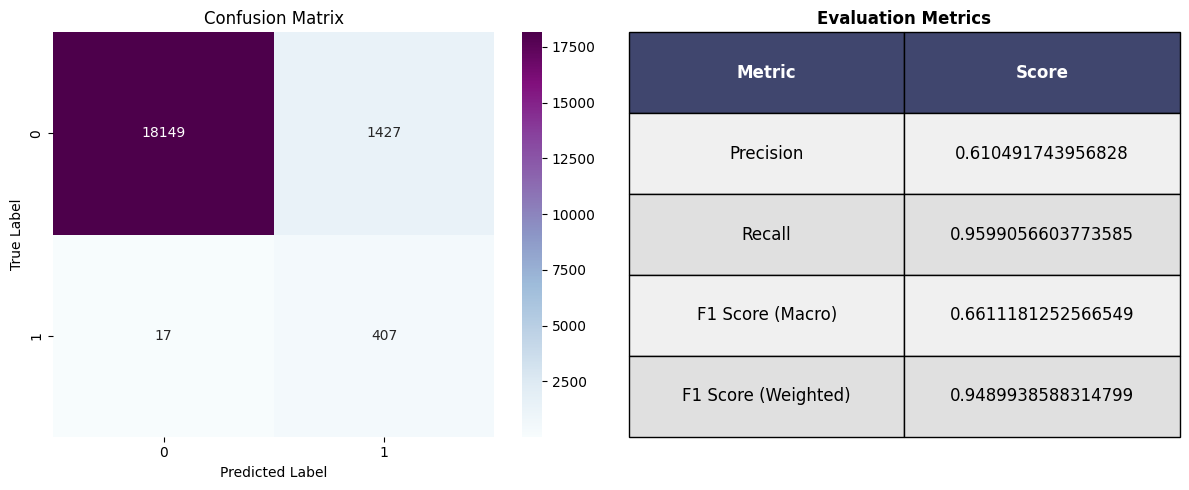

In [50]:
# Calculate metrics
conf_mat = confusion_matrix(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='macro')
recall = recall_score(y_test, y_pred_rf)
f1_macro = f1_score(y_test, y_pred_rf, average='macro')
f1_weighted = f1_score(y_test, y_pred_rf, average='weighted')

# Create metric DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score (Macro)', 'F1 Score (Weighted)'],
    'Score': [precision, recall, f1_macro, f1_weighted]
})

# Plot
plt.figure(figsize=(12, 5))

# Plot Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='BuPu', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Plot Metric Table
plt.subplot(1, 2, 2)
plt.axis('off')  # Hide axes

# Create table
tbl = plt.table(cellText=metrics_df.values,
                colLabels=metrics_df.columns,
                loc='center',
                cellLoc='center',
                colLoc='center',
                bbox=[0, 0, 1, 1])  # Full subplot

# Styling
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1.2, 1.5)

# Add color to header
for key, cell in tbl.get_celld().items():
    row, col = key
    if row == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#40466e')  # dark header
    elif row % 2 == 1:
        cell.set_facecolor('#f0f0f0')  # light gray rows
    else:
        cell.set_facecolor('#e0e0e0')  # alternating slightly darker gray

plt.title("Evaluation Metrics", fontweight='bold')

plt.tight_layout()
plt.show()

**Decision Tree**

In [51]:
# Initialize the model with important hyperparameters
dtree = DecisionTreeClassifier(
    max_depth=10,          # Limits the depth of the tree (helps prevent overfitting)
    min_samples_split=10,  # Minimum number of samples required to split an internal node
    min_samples_leaf=5,    # Minimum number of samples required to be a leaf node
    class_weight='balanced',  # Handle class imbalance
    random_state=42
)

# Train the model
dtree.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_dtree = dtree.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dtree))
print("Classification Report:\n", classification_report(y_test, y_pred_dtree))

Decision Tree Accuracy: 0.9249
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     19576
           1       0.21      0.93      0.35       424

    accuracy                           0.92     20000
   macro avg       0.61      0.93      0.65     20000
weighted avg       0.98      0.92      0.95     20000



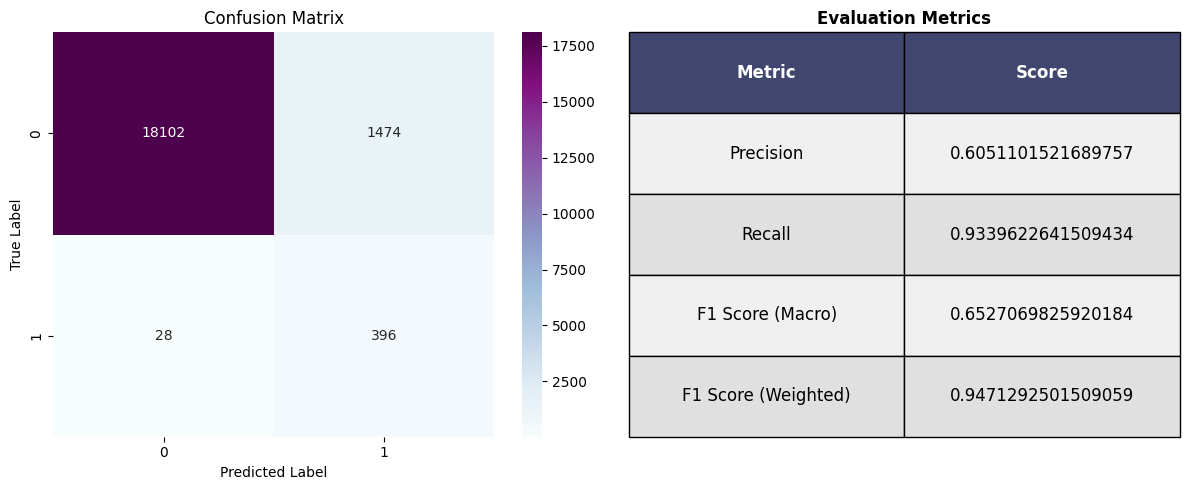

In [52]:
# Calculate metrics
conf_mat = confusion_matrix(y_test, y_pred_dtree)
precision = precision_score(y_test, y_pred_dtree, average='macro')
recall = recall_score(y_test, y_pred_dtree)
f1_macro = f1_score(y_test, y_pred_dtree, average='macro')
f1_weighted = f1_score(y_test, y_pred_dtree, average='weighted')

# Create metric DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score (Macro)', 'F1 Score (Weighted)'],
    'Score': [precision, recall, f1_macro, f1_weighted]
})

# Plot
plt.figure(figsize=(12, 5))

# Plot Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='BuPu', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Plot Metric Table
plt.subplot(1, 2, 2)
plt.axis('off')  # Hide axes

# Create table
tbl = plt.table(cellText=metrics_df.values,
                colLabels=metrics_df.columns,
                loc='center',
                cellLoc='center',
                colLoc='center',
                bbox=[0, 0, 1, 1])  # Full subplot

# Styling
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1.2, 1.5)

# Add color to header
for key, cell in tbl.get_celld().items():
    row, col = key
    if row == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#40466e')  # dark header
    elif row % 2 == 1:
        cell.set_facecolor('#f0f0f0')  # light gray rows
    else:
        cell.set_facecolor('#e0e0e0')  # alternating slightly darker gray

plt.title("Evaluation Metrics", fontweight='bold')

plt.tight_layout()
plt.show()

**Perceptron Model**

In [53]:
# Initialize model
perceptron = Perceptron(
    max_iter=1000,
    tol=1e-3,
    class_weight='balanced',
    random_state=42
)

# Train
perceptron.fit(X_train_balanced, y_train_balanced)

# Predict
y_pred_perceptron = perceptron.predict(X_test)

# Evaluate
print("Perceptron Accuracy:", accuracy_score(y_test, y_pred_perceptron))
print("Classification Report:\n", classification_report(y_test, y_pred_perceptron))

Perceptron Accuracy: 0.92065
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     19576
           1       0.21      0.99      0.35       424

    accuracy                           0.92     20000
   macro avg       0.60      0.95      0.65     20000
weighted avg       0.98      0.92      0.94     20000



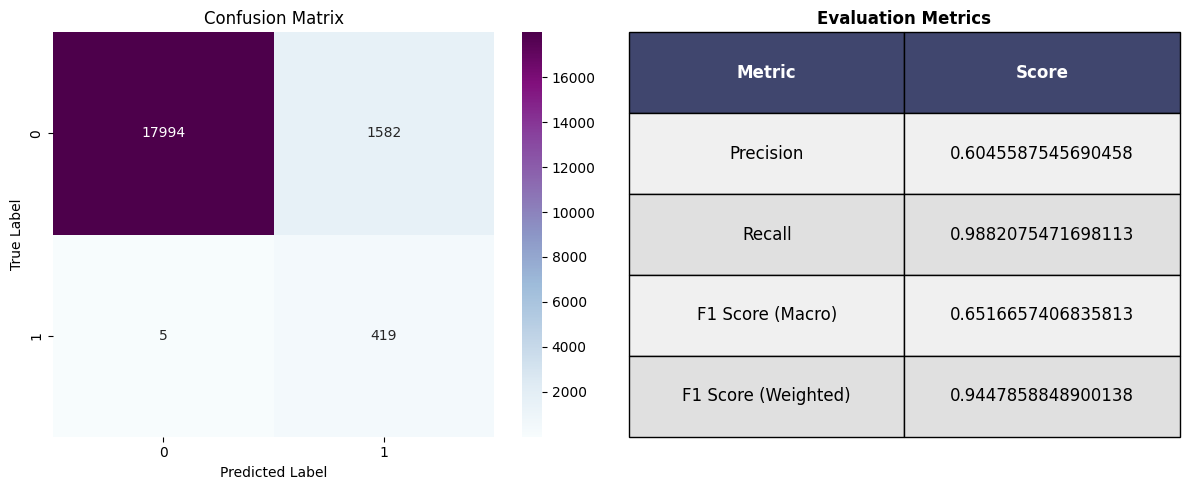

In [54]:
# Calculate metrics
conf_mat = confusion_matrix(y_test, y_pred_perceptron)
precision = precision_score(y_test, y_pred_perceptron, average='macro')
recall = recall_score(y_test, y_pred_perceptron)
f1_macro = f1_score(y_test, y_pred_perceptron, average='macro')
f1_weighted = f1_score(y_test, y_pred_perceptron, average='weighted')

# Create metric DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score (Macro)', 'F1 Score (Weighted)'],
    'Score': [precision, recall, f1_macro, f1_weighted]
})

# Plot
plt.figure(figsize=(12, 5))

# Plot Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='BuPu', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Plot Metric Table
plt.subplot(1, 2, 2)
plt.axis('off')  # Hide axes

# Create table
tbl = plt.table(cellText=metrics_df.values,
                colLabels=metrics_df.columns,
                loc='center',
                cellLoc='center',
                colLoc='center',
                bbox=[0, 0, 1, 1])  # Full subplot

# Styling
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1.2, 1.5)

# Add color to header
for key, cell in tbl.get_celld().items():
    row, col = key
    if row == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#40466e')  # dark header
    elif row % 2 == 1:
        cell.set_facecolor('#f0f0f0')  # light gray rows
    else:
        cell.set_facecolor('#e0e0e0')  # alternating slightly darker gray

plt.title("Evaluation Metrics", fontweight='bold')

plt.tight_layout()
plt.show()

**K-Nearest Neighbours (KNN)**

In [55]:
# Initialize the model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.97525
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     19576
           1       0.28      0.10      0.15       424

    accuracy                           0.98     20000
   macro avg       0.63      0.55      0.57     20000
weighted avg       0.97      0.98      0.97     20000



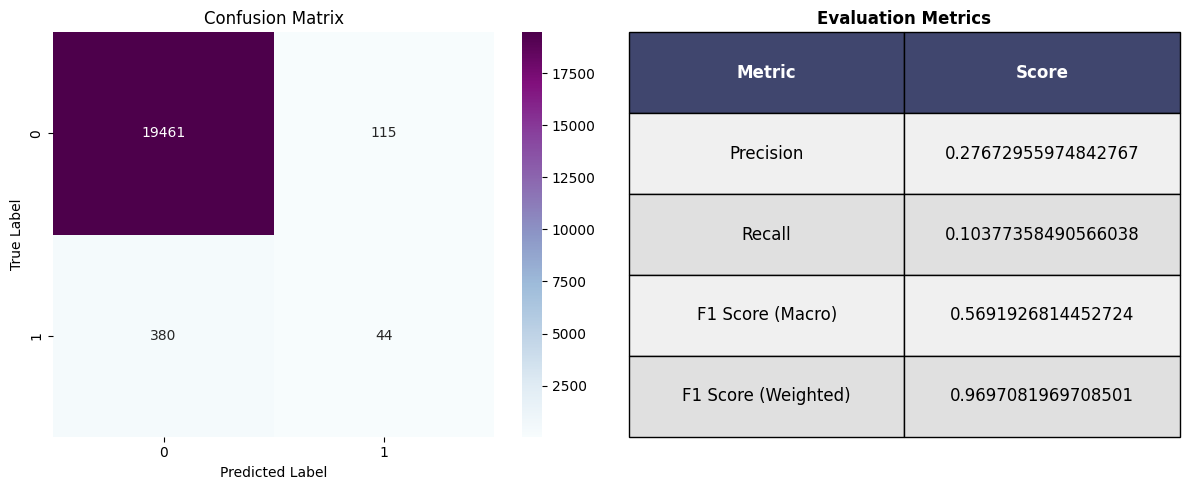

In [56]:
# Calculate metrics
conf_mat = confusion_matrix(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1_macro = f1_score(y_test, y_pred_knn, average='macro')
f1_weighted = f1_score(y_test, y_pred_knn, average='weighted')

# Create metric DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score (Macro)', 'F1 Score (Weighted)'],
    'Score': [precision, recall, f1_macro, f1_weighted]
})

# Plot
plt.figure(figsize=(12, 5))

# Plot Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='BuPu', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Plot Metric Table
plt.subplot(1, 2, 2)
plt.axis('off')  # Hide axes

# Create table
tbl = plt.table(cellText=metrics_df.values,
                colLabels=metrics_df.columns,
                loc='center',
                cellLoc='center',
                colLoc='center',
                bbox=[0, 0, 1, 1])  # Full subplot

# Styling
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1.2, 1.5)

# Add color to header
for key, cell in tbl.get_celld().items():
    row, col = key
    if row == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#40466e')  # dark header
    elif row % 2 == 1:
        cell.set_facecolor('#f0f0f0')  # light gray rows
    else:
        cell.set_facecolor('#e0e0e0')  # alternating slightly darker gray

plt.title("Evaluation Metrics", fontweight='bold')

plt.tight_layout()
plt.show()

**Gradient Boosting Classifier**

In [57]:
# Initialize the model
gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.01,
    max_depth=5,
    random_state=42
)

# Fit the model
gb.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_gb = gb.predict(X_test)

# Evaluate the model
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.97885
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     19576
           1       0.53      0.02      0.05       424

    accuracy                           0.98     20000
   macro avg       0.75      0.51      0.52     20000
weighted avg       0.97      0.98      0.97     20000



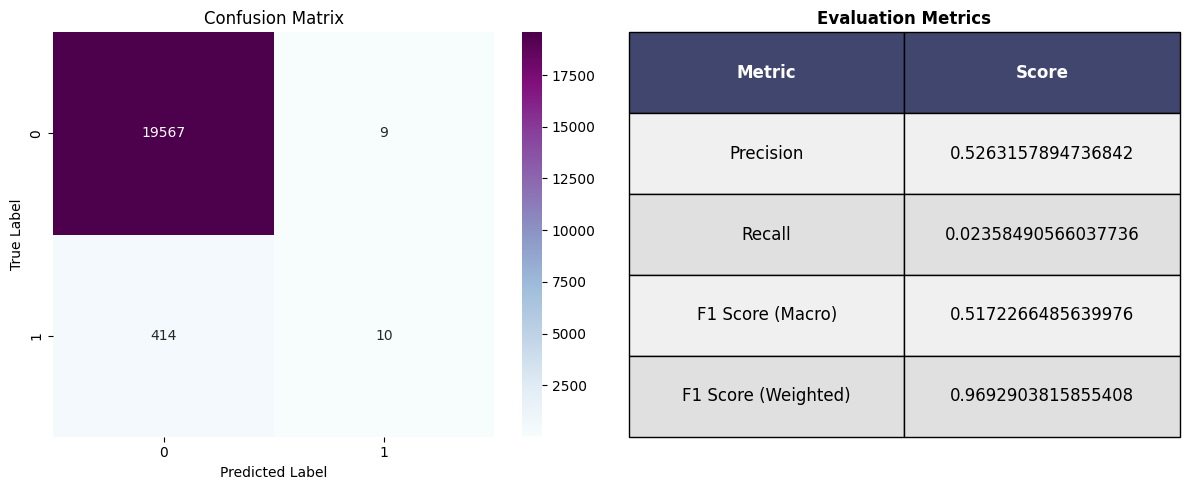

In [58]:
# Calculate metrics
conf_mat = confusion_matrix(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb)
recall = recall_score(y_test, y_pred_gb)
f1_macro = f1_score(y_test, y_pred_gb, average='macro')
f1_weighted = f1_score(y_test, y_pred_gb, average='weighted')

# Create metric DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score (Macro)', 'F1 Score (Weighted)'],
    'Score': [precision, recall, f1_macro, f1_weighted]
})

# Plot
plt.figure(figsize=(12, 5))

# Plot Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='BuPu', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Plot Metric Table
plt.subplot(1, 2, 2)
plt.axis('off')  # Hide axes

# Create table
tbl = plt.table(cellText=metrics_df.values,
                colLabels=metrics_df.columns,
                loc='center',
                cellLoc='center',
                colLoc='center',
                bbox=[0, 0, 1, 1])  # Full subplot

# Styling
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1.2, 1.5)

# Add color to header
for key, cell in tbl.get_celld().items():
    row, col = key
    if row == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#40466e')  # dark header
    elif row % 2 == 1:
        cell.set_facecolor('#f0f0f0')  # light gray rows
    else:
        cell.set_facecolor('#e0e0e0')  # alternating slightly darker gray

plt.title("Evaluation Metrics", fontweight='bold')

plt.tight_layout()
plt.show()

**XGBoost Classifier**

In [59]:
# Initialize the model
xgb = XGBClassifier(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    scale_pos_weight= (y_train_balanced == 0).sum() / (y_train_balanced == 1).sum(),  # handles class imbalance
    eval_metric='logloss',
    random_state=42
)

# Train the model
xgb.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model
print("XG Boost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

XG Boost Accuracy: 0.9262
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     19576
           1       0.22      0.98      0.36       424

    accuracy                           0.93     20000
   macro avg       0.61      0.95      0.66     20000
weighted avg       0.98      0.93      0.95     20000



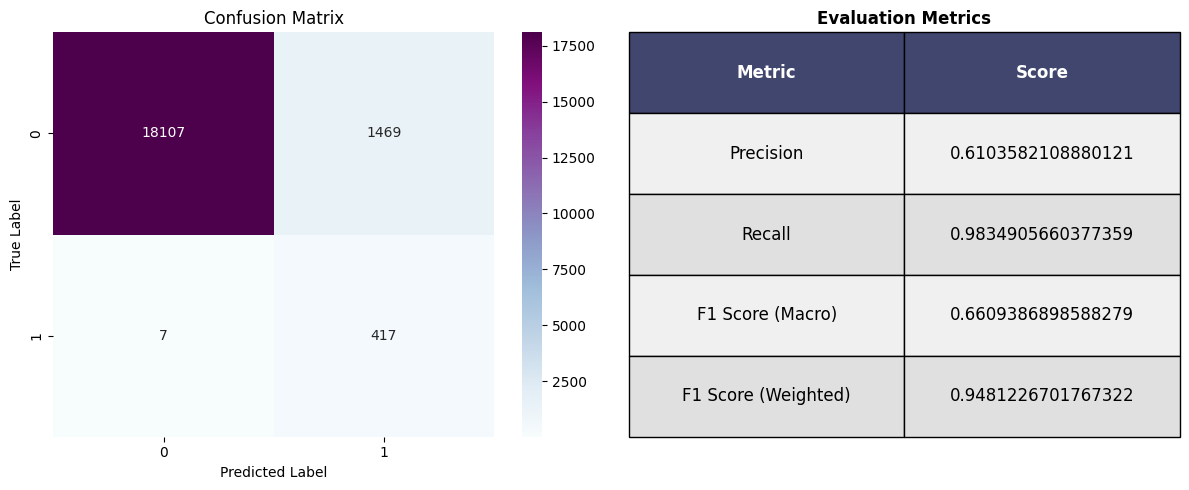

In [60]:
# Calculate metrics
conf_mat = confusion_matrix(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb, average='macro')
recall = recall_score(y_test, y_pred_xgb)
f1_macro = f1_score(y_test, y_pred_xgb, average='macro')
f1_weighted = f1_score(y_test, y_pred_xgb, average='weighted')

# Create metric DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score (Macro)', 'F1 Score (Weighted)'],
    'Score': [precision, recall, f1_macro, f1_weighted]
})

# Plot
plt.figure(figsize=(12, 5))

# Plot Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='BuPu', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Plot Metric Table
plt.subplot(1, 2, 2)
plt.axis('off')  # Hide axes

# Create table
tbl = plt.table(cellText=metrics_df.values,
                colLabels=metrics_df.columns,
                loc='center',
                cellLoc='center',
                colLoc='center',
                bbox=[0, 0, 1, 1])  # Full subplot

# Styling
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1.2, 1.5)

# Add color to header
for key, cell in tbl.get_celld().items():
    row, col = key
    if row == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#40466e')  # dark header
    elif row % 2 == 1:
        cell.set_facecolor('#f0f0f0')  # light gray rows
    else:
        cell.set_facecolor('#e0e0e0')  # alternating slightly darker gray

plt.title("Evaluation Metrics", fontweight='bold')

plt.tight_layout()
plt.show()

**Ada Boost Classifier**

In [61]:
# Initialize model
adaboost = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)

# Train
adaboost.fit(X_train_balanced, y_train_balanced)

# Predict probabilities
y_proba = adaboost.predict_proba(X_test)[:, 1]

# Threshold tuning
threshold = 0.3
y_pred_adaboost = (y_proba >= threshold).astype(int)

# Evaluate
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_adaboost))
print("Classification Report:\n", classification_report(y_test, y_pred_adaboost))

AdaBoost Accuracy: 0.92065
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     19576
           1       0.21      0.99      0.35       424

    accuracy                           0.92     20000
   macro avg       0.60      0.95      0.65     20000
weighted avg       0.98      0.92      0.94     20000



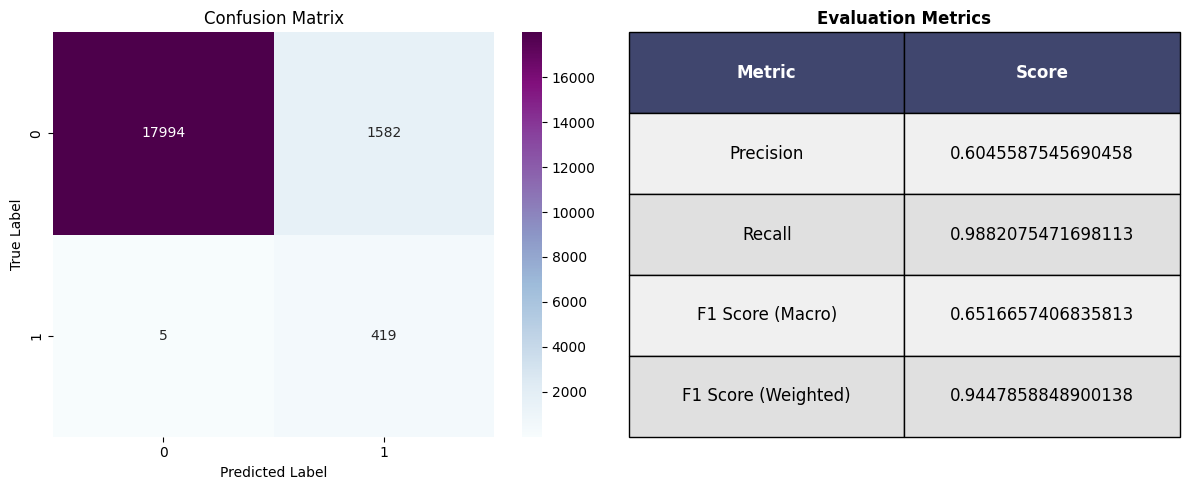

In [62]:
# Calculate metrics
conf_mat = confusion_matrix(y_test, y_pred_adaboost)
precision = precision_score(y_test, y_pred_adaboost, average='macro')
recall = recall_score(y_test, y_pred_adaboost)
f1_macro = f1_score(y_test, y_pred_adaboost, average='macro')
f1_weighted = f1_score(y_test, y_pred_adaboost, average='weighted')

# Create metric DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score (Macro)', 'F1 Score (Weighted)'],
    'Score': [precision, recall, f1_macro, f1_weighted]
})

# Plot
plt.figure(figsize=(12, 5))

# Plot Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='BuPu', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Plot Metric Table
plt.subplot(1, 2, 2)
plt.axis('off')  # Hide axes

# Create table
tbl = plt.table(cellText=metrics_df.values,
                colLabels=metrics_df.columns,
                loc='center',
                cellLoc='center',
                colLoc='center',
                bbox=[0, 0, 1, 1])  # Full subplot

# Styling
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1.2, 1.5)

# Add color to header
for key, cell in tbl.get_celld().items():
    row, col = key
    if row == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#40466e')  # dark header
    elif row % 2 == 1:
        cell.set_facecolor('#f0f0f0')  # light gray rows
    else:
        cell.set_facecolor('#e0e0e0')  # alternating slightly darker gray

plt.title("Evaluation Metrics", fontweight='bold')

plt.tight_layout()
plt.show()

**Naive Bayes Classifier**

In [63]:
# Initialize and train
gnb = GaussianNB()
gnb.fit(X_train_balanced, y_train_balanced)

# Predict
y_pred_gnb = gnb.predict(X_test)

# Evaluate
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("Classification Report:\n", classification_report(y_test, y_pred_gnb))

Naive Bayes Accuracy: 0.91795
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     19576
           1       0.20      0.93      0.32       424

    accuracy                           0.92     20000
   macro avg       0.60      0.92      0.64     20000
weighted avg       0.98      0.92      0.94     20000



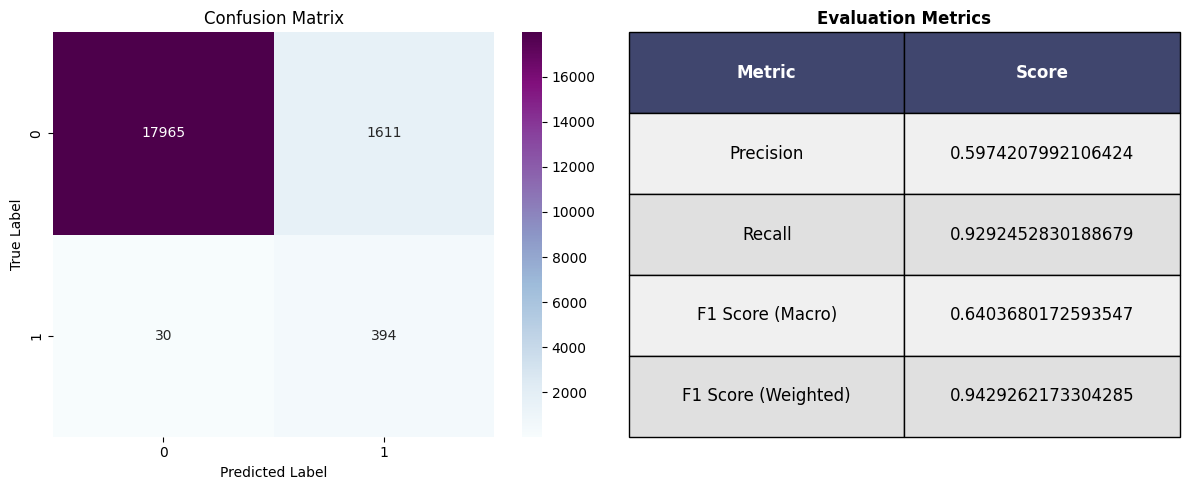

In [64]:
# Calculate metrics
conf_mat = confusion_matrix(y_test, y_pred_gnb)
precision = precision_score(y_test, y_pred_gnb, average='macro')
recall = recall_score(y_test, y_pred_gnb)
f1_macro = f1_score(y_test, y_pred_gnb, average='macro')
f1_weighted = f1_score(y_test, y_pred_gnb, average='weighted')

# Create metric DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score (Macro)', 'F1 Score (Weighted)'],
    'Score': [precision, recall, f1_macro, f1_weighted]
})

# Plot
plt.figure(figsize=(12, 5))

# Plot Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='BuPu', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Plot Metric Table
plt.subplot(1, 2, 2)
plt.axis('off')  # Hide axes

# Create table
tbl = plt.table(cellText=metrics_df.values,
                colLabels=metrics_df.columns,
                loc='center',
                cellLoc='center',
                colLoc='center',
                bbox=[0, 0, 1, 1])  # Full subplot

# Styling
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1.2, 1.5)

# Add color to header
for key, cell in tbl.get_celld().items():
    row, col = key
    if row == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#40466e')  # dark header
    elif row % 2 == 1:
        cell.set_facecolor('#f0f0f0')  # light gray rows
    else:
        cell.set_facecolor('#e0e0e0')  # alternating slightly darker gray

plt.title("Evaluation Metrics", fontweight='bold')

plt.tight_layout()
plt.show()

**Multi Layer Perceptron (MLP) Classifier**

In [65]:
# Initialize model
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),  # one hidden layer with 100 neurons
    activation='relu',
    solver='adam',
    max_iter=300,
    early_stopping=True,
    random_state=42
)

# Train
mlp.fit(X_train_balanced, y_train_balanced)

# Predict
y_pred_mlp = mlp.predict(X_test)

# Evaluate
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))

MLP Accuracy: 0.9788
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     19576
           1       0.50      0.03      0.06       424

    accuracy                           0.98     20000
   macro avg       0.74      0.52      0.53     20000
weighted avg       0.97      0.98      0.97     20000



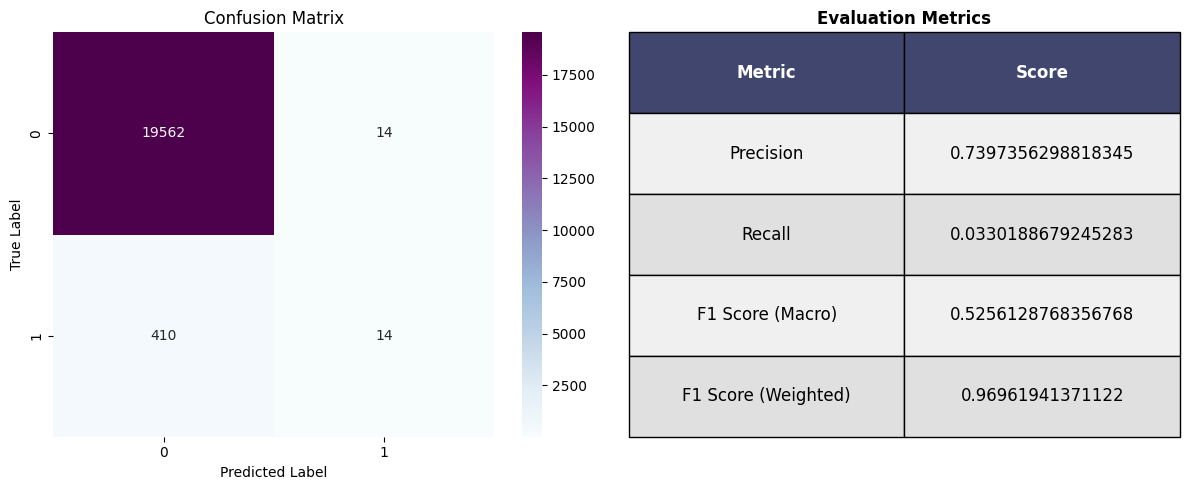

In [66]:
# Calculate metrics
conf_mat = confusion_matrix(y_test, y_pred_mlp)
precision = precision_score(y_test, y_pred_mlp, average='macro')
recall = recall_score(y_test, y_pred_mlp)
f1_macro = f1_score(y_test, y_pred_mlp, average='macro')
f1_weighted = f1_score(y_test, y_pred_mlp, average='weighted')

# Create metric DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score (Macro)', 'F1 Score (Weighted)'],
    'Score': [precision, recall, f1_macro, f1_weighted]
})

# Plot
plt.figure(figsize=(12, 5))

# Plot Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='BuPu', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Plot Metric Table
plt.subplot(1, 2, 2)
plt.axis('off')  # Hide axes

# Create table
tbl = plt.table(cellText=metrics_df.values,
                colLabels=metrics_df.columns,
                loc='center',
                cellLoc='center',
                colLoc='center',
                bbox=[0, 0, 1, 1])  # Full subplot

# Styling
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1.2, 1.5)

# Add color to header
for key, cell in tbl.get_celld().items():
    row, col = key
    if row == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#40466e')  # dark header
    elif row % 2 == 1:
        cell.set_facecolor('#f0f0f0')  # light gray rows
    else:
        cell.set_facecolor('#e0e0e0')  # alternating slightly darker gray

plt.title("Evaluation Metrics", fontweight='bold')

plt.tight_layout()
plt.show()

**SVM Model**

In [67]:
# Initialize the model with important hyperparameters
svm = SVC(
    class_weight= 'balanced', #handles class imbalance
    C=1.0,                   # Regularization strength (lower = more regularization)
    kernel='rbf',            # Kernel type: 'linear', 'poly', 'rbf', 'sigmoid'
    gamma='scale',           # Kernel coefficient ('scale' is a good default)
    probability=True,        # Enables probability estimates (needed for ROC AUC, etc.)
    random_state=42          # Reproducibility
)

# Fit the model
svm.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.92065
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     19576
           1       0.21      0.99      0.35       424

    accuracy                           0.92     20000
   macro avg       0.60      0.95      0.65     20000
weighted avg       0.98      0.92      0.94     20000



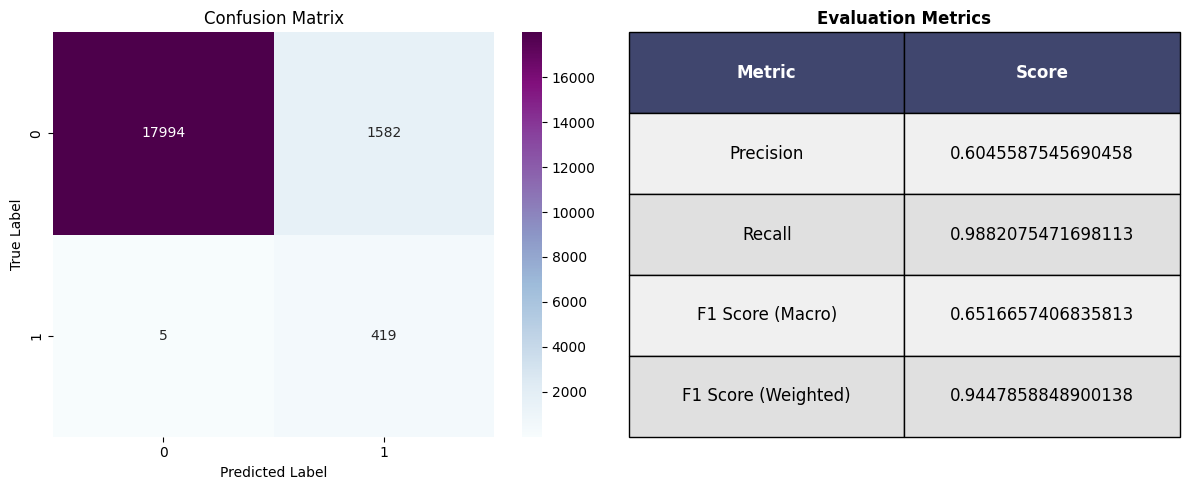

In [68]:
# Calculate metrics
conf_mat = confusion_matrix(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, average='macro')
recall = recall_score(y_test, y_pred_svm)
f1_macro = f1_score(y_test, y_pred_svm, average='macro')
f1_weighted = f1_score(y_test, y_pred_svm, average='weighted')

# Create metric DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score (Macro)', 'F1 Score (Weighted)'],
    'Score': [precision, recall, f1_macro, f1_weighted]
})

# Plot
plt.figure(figsize=(12, 5))

# Plot Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='BuPu', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Plot Metric Table
plt.subplot(1, 2, 2)
plt.axis('off')  # Hide axes

# Create table
tbl = plt.table(cellText=metrics_df.values,
                colLabels=metrics_df.columns,
                loc='center',
                cellLoc='center',
                colLoc='center',
                bbox=[0, 0, 1, 1])  # Full subplot

# Styling
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1.2, 1.5)

# Add color to header
for key, cell in tbl.get_celld().items():
    row, col = key
    if row == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#40466e')  # dark header
    elif row % 2 == 1:
        cell.set_facecolor('#f0f0f0')  # light gray rows
    else:
        cell.set_facecolor('#e0e0e0')  # alternating slightly darker gray

plt.title("Evaluation Metrics", fontweight='bold')

plt.tight_layout()
plt.show()

### Summary of Model Training

After training the most important classification models, it is found that the following models have performed the best
- **LOGISTIC REGRESSION**,
- **RANDOM FOREST**, and
- **XG BOOST**
  
So, I have plotted the feature importance plots and trained an **ENSEMBLE MODEL** with these 3 models as the base models.

In this problem statement, it is more crucial to identify the users who have actually clicked the link, that is to say a **high recall value** is more preferred than precision. So, I have tried to maintain the precision recall trade-off as much as possible, calculating the best F1 Score. 

### Feature Importance PLot

C:\Users\HP\AppData\Local\Temp\ipykernel_40144\3409406555.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importances, y=top_features, palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_40144\3409406555.py:14: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


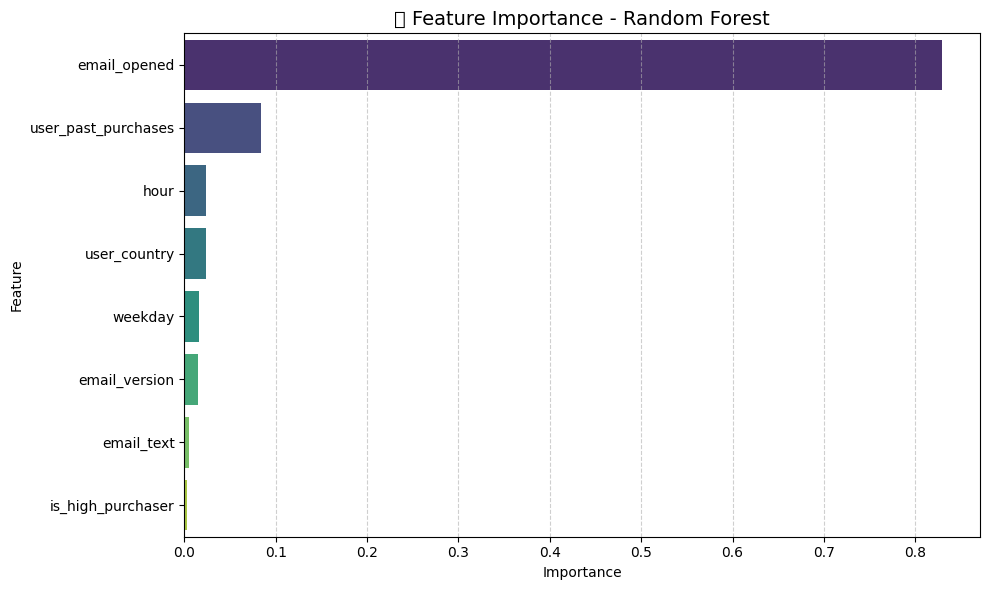

C:\Users\HP\AppData\Local\Temp\ipykernel_40144\3409406555.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importances, y=top_features, palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_40144\3409406555.py:14: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


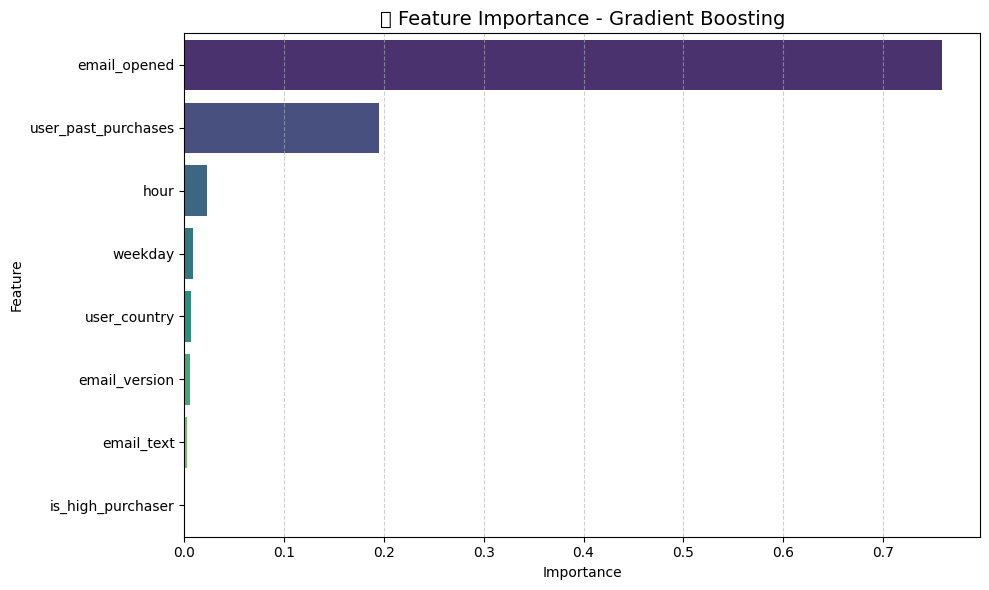

C:\Users\HP\AppData\Local\Temp\ipykernel_40144\3409406555.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importances, y=top_features, palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_40144\3409406555.py:14: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


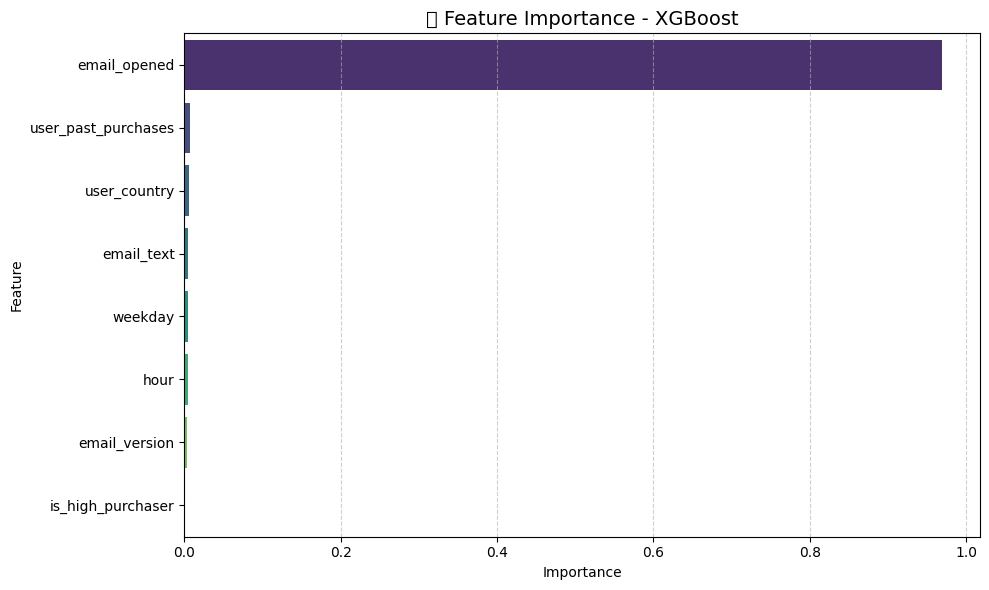

In [69]:
# Generic function to plot feature importances
def plot_feature_importance(model, feature_names, title, top_n=15):
    importances = model.feature_importances_
    indices = importances.argsort()[::-1][:top_n]
    top_features = [feature_names[i] for i in indices]
    top_importances = importances[indices]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_importances, y=top_features, palette='viridis')
    plt.title(f"🔍 Feature Importance - {title}", fontsize=14)
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Plot for Random Forest
plot_feature_importance(rf, X_train.columns, "Random Forest")

# Plot for Gradient Boosting
plot_feature_importance(gb, X_train.columns, "Gradient Boosting")

# Plot for XGBoost
plot_feature_importance(xgb, X_train.columns, "XGBoost")


### Ensemble models

In [70]:
ensemble = VotingClassifier(
    estimators=[
        ('logreg', logreg),     
        ('rf',     rf),
        ('xgb',    xgb)
    ],
    voting='soft',         # probability‑averaging
    weights=[1.5,2,3.5],   # soft voting      
    n_jobs=-1
)

# Fit the Model

ensemble.fit(X_train_balanced, y_train_balanced)

# Evaluate the Model

y_pred_vote = ensemble.predict(X_test)
print("Ensemble (soft voting) accuracy:",
      accuracy_score(y_test, y_pred_vote))
print("Classification report:\n",
      classification_report(y_test, y_pred_vote))

Ensemble (soft voting) accuracy: 0.9259
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     19576
           1       0.22      0.99      0.36       424

    accuracy                           0.93     20000
   macro avg       0.61      0.96      0.66     20000
weighted avg       0.98      0.93      0.95     20000



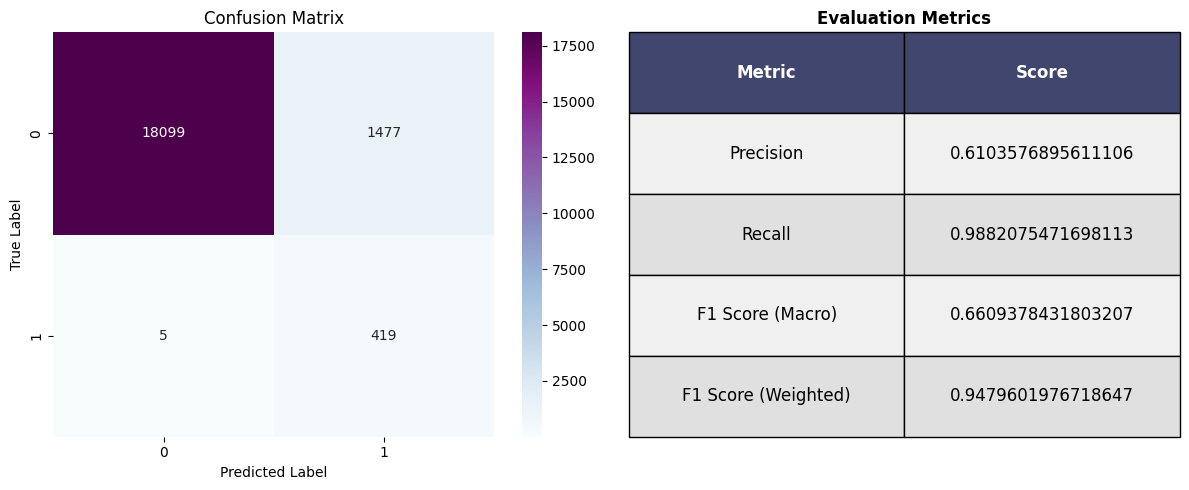

In [71]:
# Calculate metrics
conf_mat = confusion_matrix(y_test, y_pred_vote)
precision = precision_score(y_test, y_pred_vote, average='macro')
recall = recall_score(y_test, y_pred_vote)
f1_macro = f1_score(y_test, y_pred_vote, average='macro')
f1_weighted = f1_score(y_test, y_pred_vote, average='weighted')

# Create metric DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score (Macro)', 'F1 Score (Weighted)'],
    'Score': [precision, recall, f1_macro, f1_weighted]
})

# Plot
plt.figure(figsize=(12, 5))

# Plot Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='BuPu', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Plot Metric Table
plt.subplot(1, 2, 2)
plt.axis('off')  # Hide axes

# Create table
tbl = plt.table(cellText=metrics_df.values,
                colLabels=metrics_df.columns,
                loc='center',
                cellLoc='center',
                colLoc='center',
                bbox=[0, 0, 1, 1])  # Full subplot

# Styling
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1.2, 1.5)

# Add color to header
for key, cell in tbl.get_celld().items():
    row, col = key
    if row == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#40466e')  # dark header
    elif row % 2 == 1:
        cell.set_facecolor('#f0f0f0')  # light gray rows
    else:
        cell.set_facecolor('#e0e0e0')  # alternating slightly darker gray

plt.title("Evaluation Metrics", fontweight='bold')

plt.tight_layout()
plt.show()

### Saving the Ensemble Model

In [74]:
import joblib

# Save the model
joblib.dump(ensemble, 'ensemble_model.pkl')

print("✅ Ensemble model saved as 'ensemble_model.pkl'")

✅ Ensemble model saved as 'ensemble_model.pkl'


### Saving the likelihood predictions of class 1 (clicked) to a dataset

In [73]:
# Get predicted probabilities for class 1 (click)
y_proba = ensemble.predict_proba(X_test)[:, 1]

# Create a DataFrame with actual and predicted likelihood
results_df = pd.DataFrame({
    'y_test': y_test.values,
    'y_pred': y_pred_vote,
    'likelihood': y_proba
})

# Save to CSV
results_df.to_csv("click_prediction_results.csv", index=False)

### Building Smart Email Recommender

In [102]:
def recommend_best_email(user_row, model, encoder_dict, scaler=None, already_scaled=True):
    """
    Given a user_row (single user as DataFrame), returns the best email config (hour, version, text).
    """
    best_config = None
    best_score = -1

    # Possible options
    hours = list(range(1, 24))  # 24 hours
    versions = [0, 1]  # 0 = generic, 1 = personalized
    texts = [0, 1]     # 0 = short, 1 = long

    for hour in hours:
        for version in versions:
            for text in texts:
                temp = user_row.copy()
                temp['hour'] = hour
                temp['email_version'] = version
                temp['email_text'] = text
                temp['is_high_purchaser'] = int(temp['user_past_purchases'].values[0] > 13)

                if not already_scaled:
                    temp[['hour', 'user_past_purchases']] = scaler.transform(temp[['hour', 'user_past_purchases']]) # for raw unscaled data

                # Predict
                score = model.predict_proba(temp)[0][1]  # prob of clicking

                if score > best_score:
                    best_score = score
                    best_config = {
                        'send_hour': hour,
                        'email_version': 'personalized' if version == 1 else 'generic',
                        'email_text': 'long' if text == 1 else 'short',
                        'predicted_click_probability': round(score, 4)
                    }

    return best_config

The above function:

- Takes a single user's data (in a pandas DataFrame row)

- Loops through all possible email configurations

- Predicts the probability of clicking for each configuration

- Returns the best-performing configuration

In [103]:
# Selecting a random user from the X_test

random_index = np.random.choice(X_test.index)

# Select that user as a DataFrame row
sample_user = X_test.loc[[random_index]].copy()

# Preview
print("🎯 Random sample user selected:")
display(sample_user)

🎯 Random sample user selected:


,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened,is_high_purchaser
51203,1,1,0.662728,6,3,0.664023,0,0


In [104]:
# Get recommendation
recommend_best_email(sample_user, ensemble, label_encoders, already_scaled=True)

{'send_hour': 1,
 'email_version': 'personalized',
 'email_text': 'short',
 'predicted_click_probability': np.float64(0.032)}

### CONCLUSION

In this project, I have developed a machine learning solution to **optimize email marketing campaigns** by predicting the likelihood of users clicking on links within emails. Starting with raw engagement logs and campaign metadata, I have engineered key features such as **email_opened, user_past_purchases**, and content-related variables like **email_text and email_version**.

Through extensive **exploratory data analysis (EDA)**, the uncovered crucial behavioral insights are as follows:

- Opening the email is the strongest indicator of a subsequent click.

- Short emails are more opened than the long ones.

- Personalized emails consistently performed better than generic ones.

- Time of day and weekday influenced click-through rates, with engagement peaking during business hours.

- The **click through rate (CTR)** of customers having more than **13** purchases is higher and hence they are considered as valuable customers.

- **UK and US** have more CTR as compared to the other countries


Given the significant class imbalance (only ~2% clicks), I tried applying **SMOTENC**, an oversampling technique that handles both categorical and continuous variables, to balance the training data. However, the results were not satisfactory, so dropped the idea of applying SMOTENC to generate synthetic data. Instead, I have used the concept of **stratified sampling** while spliitting the data into train test split and used the hyperparameter of `class_weight='balanced'` while training the models. This takes care of the class imbalance.

Then I trained multiple classification models including **Logistic Regression, Random Forest, Gradient Boosting, and XGBoost**, which performed the best for this dataset. Each model was evaluated using precision, recall, F1-score, and ROC-AUC. Finally, to leverage the strengths of each model, I constructed a **soft-voting ensemble**, which achieved improved balanced performance. The model also enabled the creation of a **smart email recommender**, which suggests the best hour, email format, and personalization strategy for each user — maximizing the chances of link engagement.